In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 


In [37]:
df=pd.read_csv('income_evaluation.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [38]:
df.duplicated().sum()

24

In [39]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [40]:
def striptist(df):
    for i in df:
        if df[i].dtype=='object':
            df[i]=df[i].str.strip()
    return df

df=striptist(df)
    

In [41]:
df[' sex'].unique()

array(['Male', 'Female'], dtype=object)

In [42]:
from outlier import Manipulator

In [43]:
M=Manipulator(df)
M.striptist()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [44]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [45]:
df.drop([' fnlwgt',' native-country',' relationship',' education',' workclass'],axis=1,inplace=True)

<Axes: >

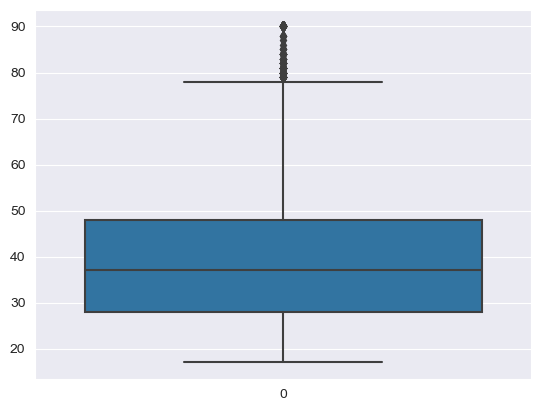

In [46]:
sns.boxplot(df["age"])

In [47]:
M.replace_with_thresholds("age")

<Axes: >

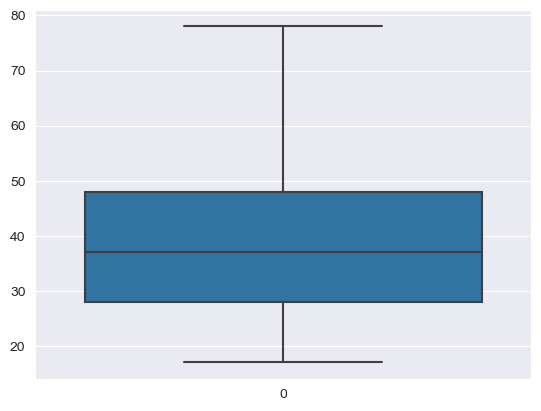

In [48]:
sns.boxplot(df["age"])

In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression 

In [50]:
X=df.drop(' income',axis=1)
y=df[' income']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.23,random_state=101)

In [51]:
numeric_columns=X.select_dtypes(include="number").columns
categorical_columns=X.select_dtypes(include="object").columns
df[' income'].replace(' <=50K',1,inplace=True)
df[' income'].replace(' >50K',0,inplace=True)
df[' income']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name:  income, Length: 32537, dtype: object

In [52]:
numPip=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
]
)

In [53]:
catPip=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

In [54]:
prep = ColumnTransformer(
    transformers=[
        ('categorical', catPip, categorical_columns),
        ('numerical', numPip, numeric_columns)
    ])

In [55]:
pipelineL=Pipeline(steps=[
    ('preprocessor',prep),
    ('model',LogisticRegression(random_state=101))
]
)

In [56]:
pipelineL.fit(X_train,y_train)
y_pred=pipelineL.predict(X_test)

/Users/ismile/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      5711
        >50K       0.74      0.60      0.66      1773

    accuracy                           0.85      7484
   macro avg       0.81      0.77      0.78      7484
weighted avg       0.85      0.85      0.85      7484


In [58]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[5331  380]
 [ 711 1062]]


In [59]:
from sklearn import metrics
accuracy1=metrics.accuracy_score(y_test, y_pred)


print(confusion_matrix(y_test, y_pred))    
print('Accuracy:',accuracy1)


[[5331  380]
 [ 711 1062]]
Accuracy: 0.8542223409941208
